In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import multi_gpu_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片 
from skimage.io import imsave
import numpy as np
import os
import random

import tensorflow as tf
from PIL import Image #读取图像处理代码
import os.path
import glob

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:

def convertjpg(jpgfile,outdir,width=256,height=256):
    img=Image.open(jpgfile)
    try:
        new_img=img.resize((width,height),Image.BILINEAR)   
        new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
    except Exception as e:
        print(e)
for jpgfile in glob.glob("../images/grouped/train_0/*.jpg"):
    convertjpg(jpgfile,"../images/grouped/train_0/")


In [5]:
# Get images
X = []
for filename in os.listdir('../images/grouped/train_0/'):
    X.append(img_to_array(load_img('../images/grouped/train_0/'+filename)))
image = np.array(X, dtype=float)
image = np.array(image, dtype=float)

In [6]:
image.shape

(80, 256, 256, 3)

In [11]:
X = rgb2lab(1.0/255*image)[:,:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,:,1:]
Y /= 128
X = X.reshape(image.shape[0], 256, 256, 1)
Y = Y.reshape(image.shape[0], 256, 256, 2)

In [12]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [13]:
# Finish model
model.compile(optimizer='rmsprop',
			loss='mse')

In [15]:
history = model.fit(x=X, 
	y=Y,
	batch_size=5,
	epochs=20,validation_split=0.25)

Train on 60 samples, validate on 20 samples
Epoch 1/20
60/60 [==============================] - 15s 255ms/step - loss: 0.9239 - val_loss: 1.0329
Epoch 2/20
60/60 [==============================] - 16s 260ms/step - loss: 0.8866 - val_loss: 0.9470
Epoch 3/20
60/60 [==============================] - 15s 252ms/step - loss: 0.8217 - val_loss: 0.9829
Epoch 4/20
60/60 [==============================] - 15s 257ms/step - loss: 0.9262 - val_loss: 0.9798
Epoch 5/20
60/60 [==============================] - 16s 261ms/step - loss: 0.9453 - val_loss: 0.9513
Epoch 6/20
60/60 [==============================] - 16s 266ms/step - loss: 0.9114 - val_loss: 1.0177
Epoch 7/20
60/60 [==============================] - 16s 264ms/step - loss: 0.9902 - val_loss: 1.0378
Epoch 8/20
60/60 [==============================] - 16s 264ms/step - loss: 0.9490 - val_loss: 0.9918
Epoch 9/20
60/60 [==============================] - 16s 262ms/step - loss: 0.9393 - val_loss: 0.9702
Epoch 10/20
60/60 [============================

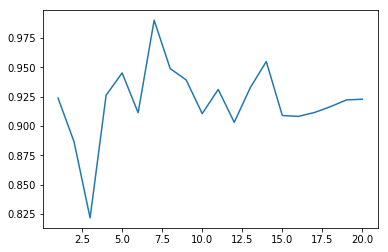

In [16]:
losses = history.history
loss = losses['loss']
epoch = np.arange(1, len(loss)+1, 1)
plt.plot(epoch, loss)

In [15]:
print(model.evaluate(X, Y, batch_size=1))
image = img_to_array(load_img('../images/test/e8e9bbcd94ed1b011456d4560e24bdd9fef995a6.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]
X = X.reshape(1, 256, 256, 1)


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (239, 300)

In [8]:

output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((256, 256, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))


C:\Users\zhangmy3\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1671 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\zhangmy3\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\zhangmy3\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [46]:
color_me = []
for filename in os.listdir('../Full-version/Test/'):
    color_me.append(img_to_array(load_img('../Full-version/Test/'+filename)))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result/img_"+str(i)+".png", lab2rgb(cur))





C:\Users\zhangmy3\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\zhangmy3\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 27 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


AttributeError: module 'tensorflow' has no attribute 'device'